1. Vanilla AutoEncoder and Decoder

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train= x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))



In [ ]:
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
import keras
from keras import layers
from keras.layers import Input,Dense
encoding_dim=32
input_img=keras.Input(shape=(784,))
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded =layers.Dense(784, activation='sigmoid')(encoded)


In [ ]:
autoencoder=keras.Model(input_img, decoded)


In [ ]:
encoder=keras.Model(input_img,encoded)
encoded_input= keras.Input(shape=(encoding_dim,))

In [ ]:
decoder_layer=autoencoder.layers[-1]

In [ ]:
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2747 - val_loss: 0.1849
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1677 - val_loss: 0.1512
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1428 - val_loss: 0.1329
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1279 - val_loss: 0.1209
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1180 - val_loss: 0.1129
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1113 - val_loss: 0.1073
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1065 - val_loss: 0.1033
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1002 - val_loss: 0.0978
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0982 - val_loss: 0.0961

In [ ]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 918us/step


In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

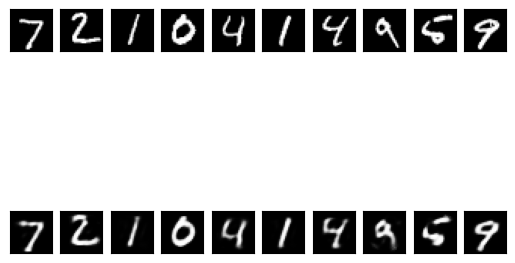

In [ ]:
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

2. De-Nosing Auto encoders

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))

In [ ]:
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
noise_factor=0.5
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1,)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

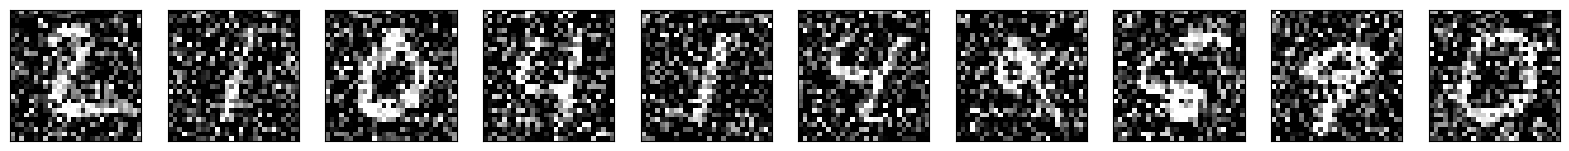

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard
encoding_dim=32
input_img=keras.Input(shape=(784,))

In [ ]:
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(784,activation='sigmoid')(encoded)
autoencoder=keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy,x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test),)
encoder=keras.Model(input_img,encoded)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2438 - val_loss: 0.1844
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1700 - val_loss: 0.1550
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1490 - val_loss: 0.1414
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1391 - val_loss: 0.1344
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1336 - val_loss: 0.1307
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1307 - val_loss: 0.1284
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1290 - val_loss: 0.1275
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1284 - val_loss: 0.1272
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1280 - val_loss: 0.1268
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1277 - val_lo

In [ ]:
encoded_input=keras.Input(shape=(encoding_dim,))
decoded_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))
encoded_imgs=encoder.predict(x_test_noisy)
decoded_imgs=decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 903us/step


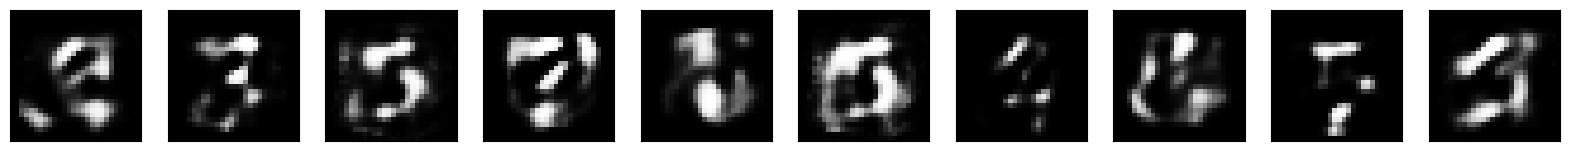

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

3. Dimensionality Reduction

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2751 - val_loss: 0.1908
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1720 - val_loss: 0.1553
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1457 - val_loss: 0.1350
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1296 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1186 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1110 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1057 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1019 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/50
235/235 [=============

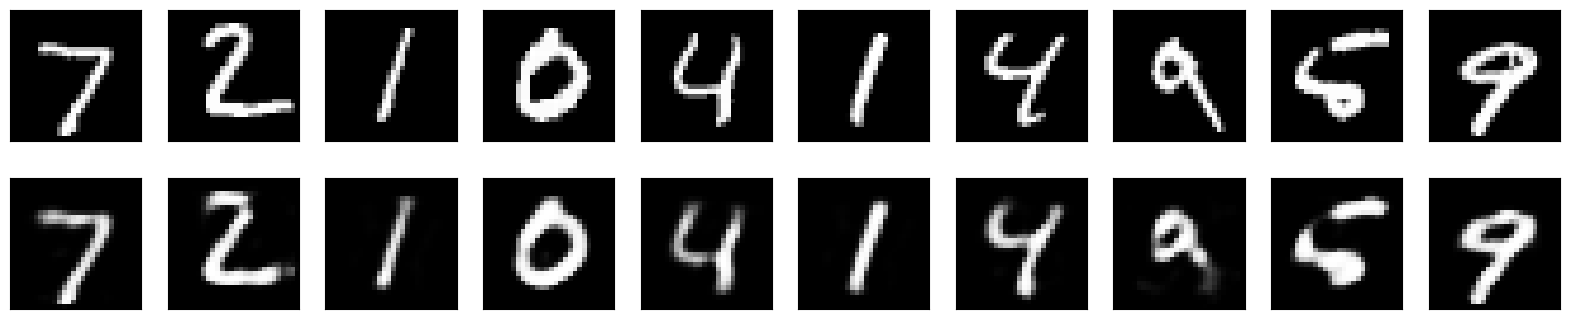

In [5]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Set the dimensions of the encoded representation
encoding_dim = 32 # 32 floats, the compressed representation of the input
# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Decoded is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# Autoencoder model
autoencoder = Model(input_img, decoded)
# Separate Encoder model
encoder = Model(input_img, encoded)
# Separate Decoder model
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Train the autoencoder
autoencoder.fit(x_train, x_train,
 epochs=50,
 batch_size=256,
 shuffle=True,validation_data=(x_test, x_test))
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# Plotting the results
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original images
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstructed images
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()



Yolo

In [ ]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
ln = net.getLayerNames()
print(len(ln), ln)
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
# YOLO object detection
import cv2 as cv
import numpy as np
import time

img = cv.imread('images/horse.jpg')
cv.imshow('window',  img)
cv.waitKey(1)

# Give the configuration and weight files for the model and load the network.
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

ln = net.getLayerNames()
print(len(ln), ln)

# construct a blob from the image
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

cv.imshow('blob', r)
text = f'Blob shape={blob.shape}'
cv.displayOverlay('blob', text)
cv.waitKey(1)

net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()

cv.displayOverlay('window', f'forward propagation time={t-t0}')
cv.imshow('window',  img)
cv.waitKey(0)
cv.destroyAllWindows()
net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
net.setInput(blob)
outputs = net.forward(ln)
# YOLO object detection
import cv2 as cv
import numpy as np
import time

img = cv.imread('images/food.jpg')
cv.imshow('window',  img)
cv.waitKey(1)

# Load names of classes and get random colors
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Give the configuration and weight files for the model and load the network.
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

# determine the output layer
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# construct a blob from the image
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

cv.imshow('blob', r)
text = f'Blob shape={blob.shape}'
cv.displayOverlay('blob', text)
cv.waitKey(1)

net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
print('time=', t-t0)

print(len(outputs))
for out in outputs:
    print(out.shape)

def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(outputs):
        if output[4] > confidence:
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
    cv.imshow('blob', r)
    text = f'Bbox confidence={confidence}'
    cv.displayOverlay('blob', text)

r0 = blob[0, 0, :, :]
r = r0.copy()
cv.imshow('blob', r)
cv.createTrackbar('confidence', 'blob', 50, 101, trackbar2)
trackbar2(50)

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

cv.imshow('window', img)
cv.waitKey(0)
cv.destroyAllWindows()
# YOLO object detection
import cv2 as cv
import numpy as np
import time

WHITE = (255, 255, 255)
img = None
img0 = None
outputs = None

# Load names of classes and get random colors
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Give the configuration and weight files for the model and load the network.
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

# determine the output layer
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

def load_image(path):
    global img, img0, outputs, ln

    img0 = cv.imread(path)
    img = img0.copy()

    blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)
    t0 = time.time()
    outputs = net.forward(ln)
    t = time.time() - t0

    # combine the 3 output groups into 1 (10647, 85)
    # large objects (507, 85)
    # medium objects (2028, 85)
    # small objects (8112, 85)
    outputs = np.vstack(outputs)

    post_process(img, outputs, 0.5)
    cv.imshow('window',  img)
    cv.displayOverlay('window', f'forward propagation time={t:.3}')
    cv.waitKey(0)

def post_process(img, outputs, conf):
    H, W = img.shape[:2]

    boxes = []
    confidences = []
    classIDs = []

    for output in outputs:
        scores = output[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > conf:
            x, y, w, h = output[:4] * np.array([W, H, W, H])
            p0 = int(x - w//2), int(y - h//2)
            p1 = int(x + w//2), int(y + h//2)
            boxes.append([*p0, int(w), int(h)])
            confidences.append(float(confidence))
            classIDs.append(classID)
            # cv.rectangle(img, p0, p1, WHITE, 1)

    indices = cv.dnn.NMSBoxes(boxes, confidences, conf, conf-0.1)
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in colors[classIDs[i]]]
            cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
            cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

def trackbar(x):
    global img
    conf = x/100
    img = img0.copy()
    post_process(img, outputs, conf)
    cv.displayOverlay('window', f'confidence level={conf}')
    cv.imshow('window', img)

cv.namedWindow('window')
cv.createTrackbar('confidence', 'window', 50, 100, trackbar)
load_image('images/horse.jpg')
load_image('images/traffic.jpg')
load_image('images/zoo.jpg')
load_image('images/kitchen.jpg')
load_image('images/airport.jpg')
load_image('images/tennis.jpg')
load_image('images/wine.jpg')
load_image('images/bicycle.jpg')

cv.destroyAllWindows()